In [1]:
# IMPORT BIBLIOTEK
import numpy as np
import pandas as pd
import sklearn as s
import matplotlib.pyplot as plt
import keras as k
import seaborn as sb
sb.set()

Using TensorFlow backend.


In [2]:
#conda install -c conda-forge imbalanced-learn
import imblearn 
from imblearn.over_sampling import SMOTE
print(imblearn.__version__)

0.5.0


In [3]:
#conda install -c conda-forge keras
# sieci neuronowe

from keras import models as km
from keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [5]:
# IMPORT DANYCH
dcc = pd.read_csv('C:/Users/eweli/Desktop/creditcard.csv')

In [12]:
# INFORMACJE O WYMIARZE DANYCH I PRÓBKA
print(dcc.shape)
dcc.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# GŁOWNE STATYSTYKI DANYCH, DANE ZNORMALIZOWANE, PODDANE ALGORYTMOWI PCA
dcc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# DANE KOMPLETNE, NIE WYSTĘPUJĄ BRAKI W DANYCH
dcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [13]:
# ROZKŁAD ZMIENNEJ KLASYFIKUJĄCEJ WSKAZUJE NA ZBIÓR NIEZBILANSOWANY


trx = {0:'Normal', 1:'Fraud'}
print(dcc.Class.value_counts().rename(index = trx))



Normal    284315
Fraud        492
Name: Class, dtype: int64


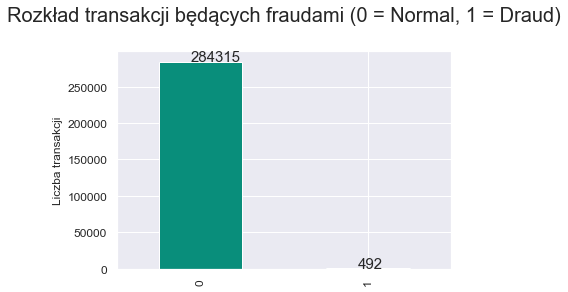

In [13]:
# ROZKŁAD ZMIENNEJ KLASYFIKUJĄCEJ WSKAZUJE NA ZBIÓR NIEZBILANSOWANY

ax = dcc['Class'].value_counts().plot(kind='bar', figsize=(6, 4), fontsize=12, color='#098E7B')
ax.set_title('Rozkład transakcji będących fraudami (0 = Normal, 1 = Draud)', size=20, pad=30)
ax.set_ylabel('Liczba transakcji', fontsize=12)


for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)


In [6]:
# PODZIAŁ ZBIORU NA X I Y
y = dcc['Class']
x = dcc.drop('Class', axis = 1)

In [15]:
print(smote)

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=None, ratio=None,
      sampling_strategy='minority', svm_estimator='deprecated')


In [7]:
# MULTIPLIKACJA REKORDÓW KLASY MNIEJSZOŚCIOWEJ ZA POMOCĄ METODY K-NAJBLIŻSZYCH SĄSIADÓW O PARAMETRZE 5
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_sample(x, y)
x = x_sm
y = y_sm

1    284315
0    284315
dtype: int64

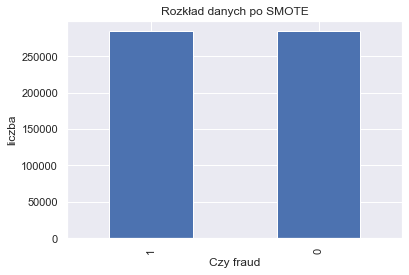

In [25]:
# HISTOGRAM ROZKŁADU PO PRZETWORZENIU ZBIORU METODĄ SMOTE
pd.value_counts(y).plot.bar()
plt.title('Rozkład danych po SMOTE')
plt.xlabel('Czy fraud')
plt.ylabel('liczba')
pd.value_counts(y)

In [8]:
# PODZIAŁ ZBIORU NA UCZĄCY I TESTOWY
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

In [27]:
# LICZBA REKORDÓW W ZBIORZE UCZĄCYM
len(x_train)

398041

In [28]:
# LICZBA REKORDÓW W ZBIORZE TESTOWYM
len(x_test)

170589

In [9]:
# MODEL REGRESJI LOGISTYCZNEJ
from sklearn import linear_model
lr = linear_model.LogisticRegression(C=1e5)

In [10]:
# TRENOWANIE MODELU REGRESJI LOGISTYCZNEJ
lr.fit(x_train, y_train)

C:\Users\eweli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# PREDYKCJA MODELU REGRESJI LOGISTYCZNEJ
y_pred_rl = lr.predict(x_test)

In [13]:
# MACIERZ KONFUZJI MODELU REGRESJI LOGISTYCZNEJ 
print(confusion_matrix(y_test,y_pred_rl))

[[83850  1352]
 [ 4482 80905]]


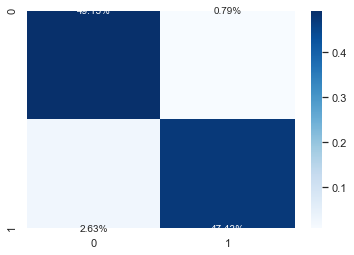

In [14]:
# WYKRES MACIERZY KONFUZJI MODELU REGRESJI LOGISTYCZNEJ
cm1 = confusion_matrix(y_test, y_pred_rl)
sb.heatmap(cm1/np.sum(cm1), annot = True, fmt='0.2%',cmap='Blues')

In [15]:
# DOKŁADNOŚĆ KLASYFIKACJI MODELU REGRESJI LOGISTYCZNEJ
print(accuracy_score(y_test,y_pred_rl))

0.9658008429617384


In [16]:
# CZUŁOŚĆ MODELU REGRESJI LOGISTYCZNEJ
print(recall_score(y_test,y_pred_rl))

0.9475095740569408


In [17]:
# PRECYZJA MODELU REGRESJI LOGISTYCZNEJ
print(precision_score(y_test,y_pred_rl))

0.9835637088636834


In [18]:
# DEFINICJA WYKRESU ROC

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('KRZYWA ROC MODELU')
    plt.legend()
    plt.show()

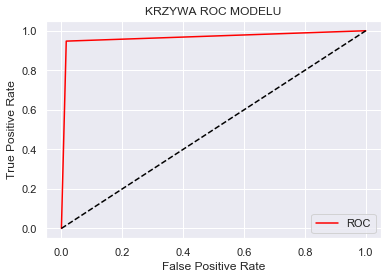

In [19]:
# WYKRES ROC DLA MODELU REGRESJI LOGISTYCZNEJ
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rl)
plot_roc_curve(fpr, tpr)

In [19]:
# POLE POD KRZYWĄ ROC DLA MODELU REGRESJI LOGISTYCZNEJ
auc = roc_auc_score(y_test, y_pred_rl)
print('AUC: %.2f' % auc)

AUC: 0.97


In [35]:
# MODEL KLASYFIKATORA DRZEWA DECYZYJNEGO - WSPÓŁCZYNNIK OCENY NIEJEDNORODNOŚCI GINI

drzewo = DecisionTreeClassifier(criterion="gini")
model_drzewo_gini = drzewo.fit(x_train, y_train)

In [36]:
# PREDYKCJA MODELU KLASYFIKATORA DRZEWA DECYZYJNEGO - GINI
y_pred_ddG  = model_drzewo_gini.predict(x_test)

In [37]:
# MACIERZ KONFUZJI MODELU KLASYFIKATORA DRZEWA DECYZYJNEGO - GINI
print(confusion_matrix(y_test,y_pred_ddG ))

[[84995   207]
 [  113 85274]]


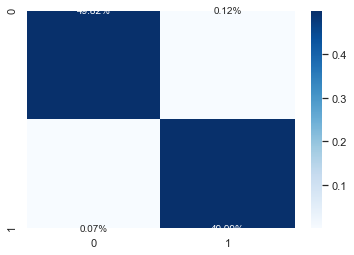

In [38]:
# WYKRES MACIERZY KONFUZJI MODELU KLASYFIKATORA DRZEWA DECYZYJNEGO - GINI

cm1 = confusion_matrix(y_test, y_pred_ddG)
sb.heatmap(cm1/np.sum(cm1), annot = True, fmt='0.2%',cmap='Blues')

In [39]:
# DOKŁADNOŚĆ KLASYFIKACJI MODELU KLASYFIKATORA DRZEWA DECYZYJNEGO - GINI
print(accuracy_score(y_test,y_pred_ddG ))

0.9981241463400337


In [40]:
# CZUŁOŚĆ MODELU KLASYFIKATORA DRZEWA DECYZYJNEGO - GINI
print(recall_score(y_test,y_pred_ddG))

0.9986766135360183


In [41]:
# PRECYZJA MODELU REGRESJI LOGISTYCZNEJ
print(precision_score(y_test,y_pred_ddG))

0.9975784092371404


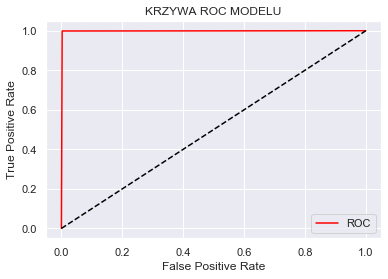

In [42]:
# WYKRES ROC DLA MODELU KLASYFIKATORA DRZEWA DECYZYJNEGO - GINI
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ddG)
plot_roc_curve(fpr, tpr)

In [43]:
# POLE POD KRZYWĄ ROC DLA KLASYFIKATORA DRZEWA DECYZYJNEGO - GINI
auc = roc_auc_score(y_test, y_pred_ddG)
print('AUC: %.2f' % auc)

AUC: 1.00


In [44]:
# MODEL REGRESORA DRZEWA DECYZYJNEGO - BŁĄD ŚREDNIOKWADRATOWY MSE
drzewo_reg = DecisionTreeRegressor(criterion="mse")
model_drzewo_mse = drzewo_reg.fit(x_train, y_train)

In [45]:
# PREDYKCJA MODELU REGRESORA DRZEWA DECYZYJNEGO - BŁĄD ŚREDNIOKWADRATOWY MSE
y_pred_ddmse  = model_drzewo_mse.predict(x_test)

In [46]:
# MACIERZ KONFUZJI MODELU REGRESORA DRZEWA DECYZYJNEGO - BŁĄD ŚREDNIOKWADRATOWY MSE
print(confusion_matrix(y_test,y_pred_ddmse ))

[[85000   202]
 [  115 85272]]


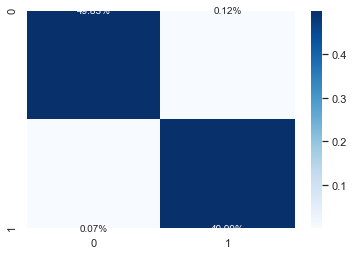

In [47]:
# WYKRES MACIERZY KONFUZJI MODELU REGRESORA DRZEWA DECYZYJNEGO - BŁĄD ŚREDNIOKWADRATOWY MSE
cm1 = confusion_matrix(y_test, y_pred_ddmse)
sb.heatmap(cm1/np.sum(cm1), annot = True, fmt='0.2%',cmap='Blues')

In [48]:
# MIARA DOKŁADNOŚCI MODELU REGRESORA DRZEWA DECYZYJNEGO - BŁĄD ŚREDNIOKWADRATOWY MSE
print(accuracy_score(y_test,y_pred_ddmse ))

0.9981417324680958


In [49]:
# CZUŁOŚĆ MODELU REGRESORA DRZEWA DECYZYJNEGO - BŁĄD ŚREDNIOKWADRATOWY MSE
print(recall_score(y_test,y_pred_ddmse))

0.9986531907667443


In [50]:
# PRECYZJA MODELU REGRESORA DRZEWA DECYZYJNEGO - BŁĄD ŚREDNIOKWADRATOWY MSE
print(precision_score(y_test,y_pred_ddmse))

0.9976367082387627


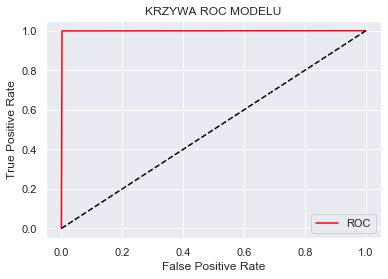

In [49]:
# WYKRES ROC DLA MODELU REGRESORA DRZEWA DECYZYJNEGO - BŁĄD ŚREDNIOKWADRATOWY MSE
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ddmse)
plot_roc_curve(fpr, tpr)

In [51]:
# POLE POD KRZYWĄ ROC DLA MODELU REGRESORA DRZEWA DECYZYJNEGO - BŁĄD ŚREDNIOKWADRATOWY MSE
auc = roc_auc_score(y_test, y_pred_ddmse)
print('AUC: %.2f' % auc)

AUC: 1.00


In [22]:
# MODEL SIECI NEURONOWEJ 

model = Sequential()
model.add(Dense(22, input_dim=30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [23]:
# TRENOWANIE SIECI NEURONOWEJ

model.fit(x_train, y_train, epochs=4, batch_size=1)

Epoch 1/4
398041/398041 [==============================] - 683s 2ms/step - loss: 6.0107 - accuracy: 0.7645
Epoch 2/4
398041/398041 [==============================] - 701s 2ms/step - loss: 0.2180 - accuracy: 0.9285
Epoch 3/4
398041/398041 [==============================] - 741s 2ms/step - loss: 0.1829 - accuracy: 0.9446
Epoch 4/4
398041/398041 [==============================] - 771s 2ms/step - loss: 0.1734 - accuracy: 0.9475


In [25]:
# MIARA DOKŁADNOŚCI SIECI NEURONOWEJ
# TRENOWANIE SIECI NEURONOWEJ

model.fit(x_train, y_train, epochs=4, batch_size=1)
print(accuracy_score(y_test,predykcja_sn ))

Epoch 1/4
398041/398041 [==============================] - 794s 2ms/step - loss: 0.1558 - accuracy: 0.9569
Epoch 2/4
398041/398041 [==============================] - 784s 2ms/step - loss: 0.1373 - accuracy: 0.9593
Epoch 3/4
398041/398041 [==============================] - 791s 2ms/step - loss: 0.1306 - accuracy: 0.9614
Epoch 4/4
398041/398041 [==============================] - 811s 2ms/step - loss: 0.1615 - accuracy: 0.9605
0.9734332225407265


In [ ]:
# PREDYKCJA SIECI NEURONOWEJ

predykcja_sn = model.predict_classes(x_test)

In [33]:
# CZUŁOŚĆ MODELU KLASYFIKATORA DRZEWA DECYZYJNEGO - GINI
print(recall_score(y_test,predykcja_sn))

0.9469708503636385


In [34]:
# PRECYZJA MODELU SIECI NEURONOWEJ

print(precision_score(y_test,predykcja_sn))

0.9922567186157811


In [29]:
# MACIERZ KONFUZJI SIECI NEURONOWEJ

print(confusion_matrix(y_test,predykcja_sn ))

[[84571   631]
 [ 4528 80859]]


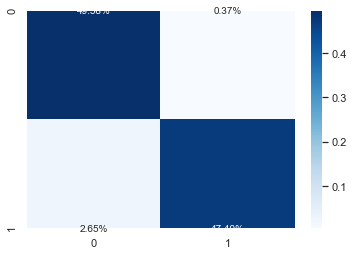

In [31]:
# WYKRES MACIERZY KONFUZJI SIECI NEURONOWEJ

cm1 = confusion_matrix(y_test, predykcja_sn)
sb.heatmap(cm1/np.sum(cm1), annot = True, fmt='0.2%',cmap='Blues')

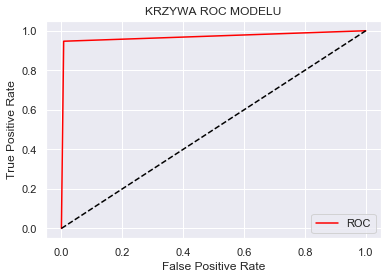

In [30]:
# WYKRES KRZYWEJ ROC SIECI NEURONOWEJ
fpr, tpr, thresholds = roc_curve(y_test, predykcja_sn)
plot_roc_curve(fpr, tpr)


In [32]:
# POLE POD KRZYWĄ SIECI NEURONOWEJ
auc = roc_auc_score(y_test, predykcja_sn)
print('AUC: %.2f' % auc)

AUC: 0.97
